In [7]:
import pandas as pd

#Loading the dataset
df = pd.read_csv('../Raw_Data/TRANSACTION_TAKEHOME.csv')

# 1. General overview of the dataset: number of rows, columns, and data types
def dataset_overview(df):
    print("Dataset Overview")
    print("Number of Rows: ", df.shape[0])
    print("Number of Columns: ", df.shape[1])
    print("\n Column Data Types")
    print(df.dtypes)
    print("\n")

# 2. Summary of missing values
def missing_values_summary(df):
    print("Missing Values Summary")
    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
    print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))
    print("\n")

# Generate the dataset summary
def generate_summary(df):
    dataset_overview(df)
    missing_values_summary(df)

generate_summary(df)

Dataset Overview
Number of Rows:  50000
Number of Columns:  8

 Column Data Types
RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object


Missing Values Summary
                Missing Values  Percentage
RECEIPT_ID                   0       0.000
PURCHASE_DATE                0       0.000
SCAN_DATE                    0       0.000
STORE_NAME                   0       0.000
USER_ID                      0       0.000
BARCODE                   5762      11.524
FINAL_QUANTITY               0       0.000
FINAL_SALE                   0       0.000




Convert Date Columns to Datetime: Convert both PURCHASE_DATE and SCAN_DATE columns to the appropriate datetime format.

In [8]:
# Convert PURCHASE_DATE and SCAN_DATE to datetime format
df['PURCHASE_DATE'] = pd.to_datetime(df['PURCHASE_DATE'], errors='coerce')
df['SCAN_DATE'] = pd.to_datetime(df['SCAN_DATE'], errors='coerce')

Fix FINAL_QUANTITY Values: Replace strings like "zero" with numeric 0 and convert the column to numeric.

In [9]:
# Replace 'zero' with 0 and convert FINAL_QUANTITY to numeric
df['FINAL_QUANTITY'] = df['FINAL_QUANTITY'].replace('zero', 0).astype(float)

print(df['FINAL_QUANTITY'])

0        1.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
49995    2.0
49996    1.0
49997    1.0
49998    1.0
49999    1.0
Name: FINAL_QUANTITY, Length: 50000, dtype: float64


### Visualizations

1. Sales Trends Over Time
- This time series plot shows the total sales over time, which helps identify seasonal trends or spikes in transactions.


/var/folders/31/8b56lkw13m1cyzqj6t3xvmcr0000gn/T/ipykernel_50034/1219742556.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_time_series = df.set_index('PURCHASE_DATE').resample('M')['FINAL_SALE'].sum()


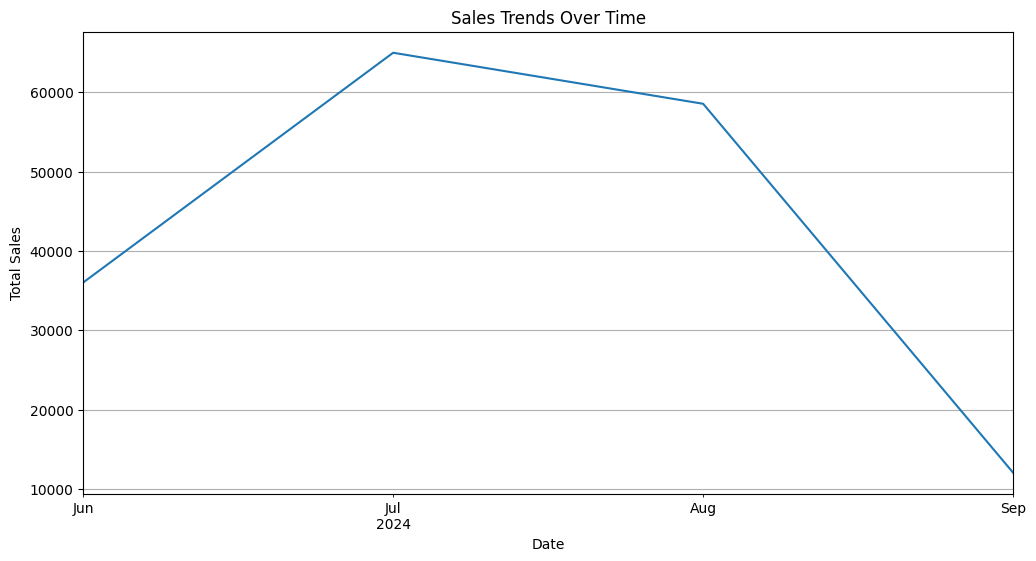

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert PURCHASE_DATE to datetime
df['PURCHASE_DATE'] = pd.to_datetime(df['PURCHASE_DATE'], errors='coerce')

# Convert FINAL_SALE to numeric, forcing invalid values to NaN
df['FINAL_SALE'] = pd.to_numeric(df['FINAL_SALE'], errors='coerce')

# Group by purchase month and sum sales
sales_time_series = df.set_index('PURCHASE_DATE').resample('M')['FINAL_SALE'].sum()

# Plot the time series of sales over time
plt.figure(figsize=(12, 6))
sales_time_series.plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



2. Time Series of Average Sales by Transaction
- This line plot shows the trend of average sales per transaction over time.

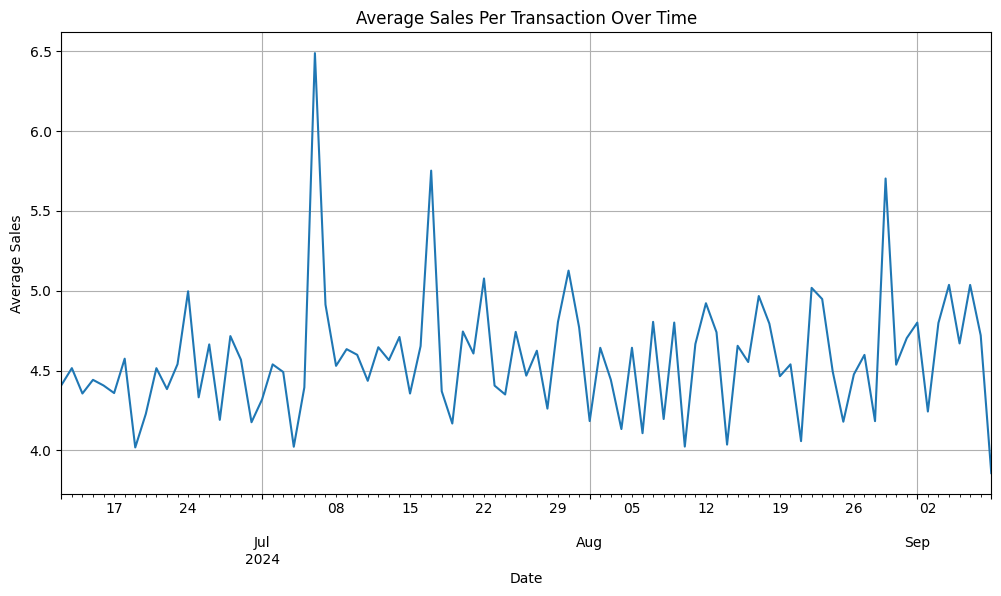

In [12]:
# Convert PURCHASE_DATE to datetime if not already done
df['PURCHASE_DATE'] = pd.to_datetime(df['PURCHASE_DATE'], errors='coerce')

# Group by purchase date and calculate average sale amount
average_sales_over_time = df.groupby('PURCHASE_DATE')['FINAL_SALE'].mean()

# Plot average sales over time
plt.figure(figsize=(12, 6))
average_sales_over_time.plot()
plt.title('Average Sales Per Transaction Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()


3. Store-wise Top 10 Transaction Distribution
- This bar chart will show how transactions for top 10 stores are distributed across stores.



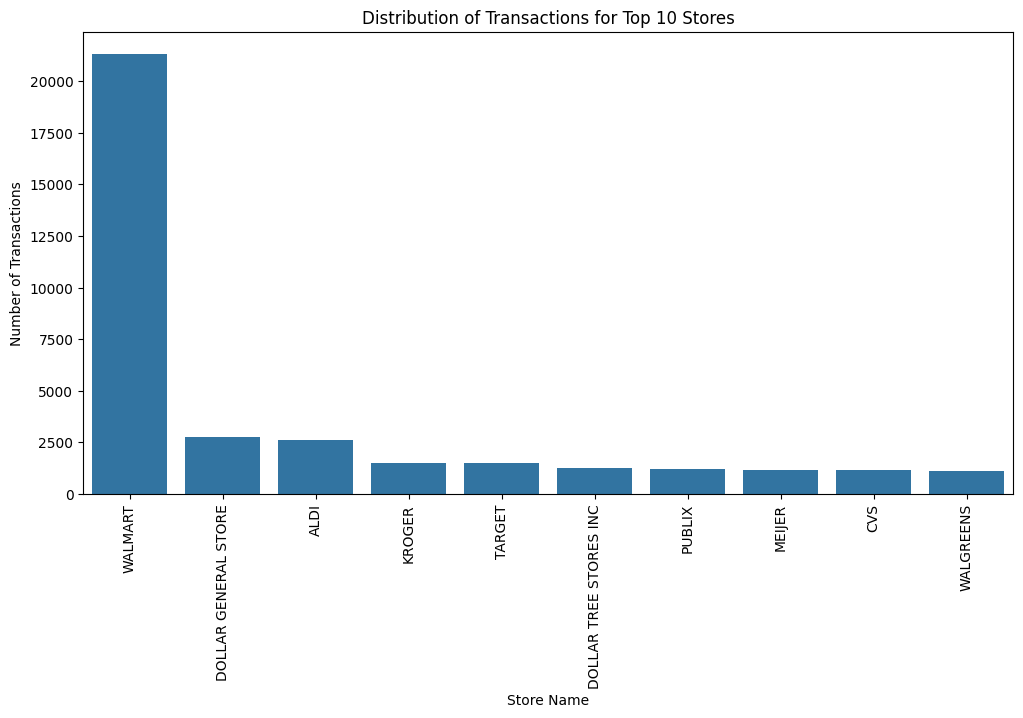

In [13]:
# Count transactions by store and get the top 10 stores
store_counts = df['STORE_NAME'].value_counts().head(10)

# Plot the distribution of transactions for the top 10 stores
plt.figure(figsize=(12, 6))
sns.barplot(x=store_counts.index, y=store_counts.values)
plt.title('Distribution of Transactions for Top 10 Stores')
plt.xticks(rotation=90)
plt.xlabel('Store Name')
plt.ylabel('Number of Transactions')
plt.show()
